# CS4650 Assignment 3: Trains and Logistic Regression
Corey Nambu

    Our goal is to determine if the data presented in the provided csv file contains information that shows a distinct difference between type 1 and type 2 train accidents.
    To determine if there is a difference, we will take the real data and use it to create a logistic regression model. From this model, we will attempt to create a 
    prediction as to which accident will fall under what category.
    We will use a confusion matrix to compare our predictive model with the real data. If there is a large amount of false positives/negatives this indicates that our predictive model
    created through logistic regression is incorrect. If our model is incorrect, we can assume that the provided data did not contain sufficient distinction between type 1 and type 2 accidents.
    If there were enough data to distinguish them, our model would have been trained properly to dinstinguish them.
### If our logistic regression model can successfuly identify what category each accident falls under, we can assume there was sufficient data to prove that the types of accidents are distinct

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
df = pd.read_csv("FRAFirm.csv")
df.drop_duplicates(inplace = True)  #Cull duplicates, inplace = true makes it replace df instead of making copy

In [3]:
y = df.Class;   #y is the target, in this case the class of accident
X = df.iloc[:, df.columns != 'Class']
#iloc copies the tables
#: includes all columns from the table. FistCol : Last col can be a range of columns to use if you want
#Third argument tells computer which columns to keep, all cols except Class

In [4]:
y.value_counts()   #Display how many types of each accident there are, and number of no accidents

0    34862
1     1779
2      665
Name: Class, dtype: int64

    This function will create and train a logistic regression model, then use that model to create and display a confusion matrix based on that model and the real data
    It will be used for the purpose of retraining our model for some tests, as well as display the results of our model and how it compares to the real data.<br>
    We will use this to experiment with removing and changing values

In [5]:
#This function will create and train a logistic regression model, then use that model to create and display a confusion matrix based on that model and the real data
def create_logistic_regression_and_confusion_matrix(X_input, y_input):
    #Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=0.20, random_state=12, stratify=y)

    #Scale the values to avoid erros
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

    #Create logistic regression model and train to the scaled data
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    
    #Create prediction of y, used in our confusion matrix
    y_pred = model.predict(X_test_scaled)   
    y_pred

    #Create and display confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)   #Create confusion matrix, y_test is actual value and y_pred is the prediction created from Logistic Regression
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)  #Create display of confusion matrix
    disp.plot() #Display confusion matrix

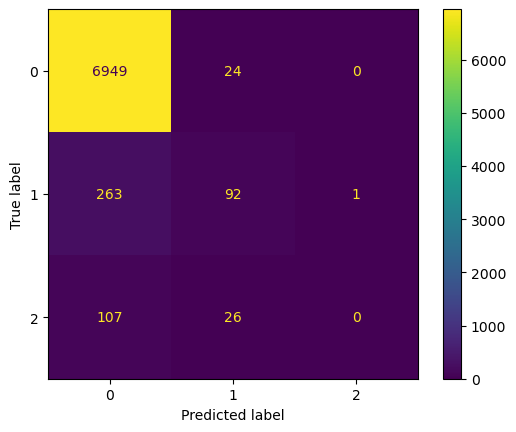

In [6]:
create_logistic_regression_and_confusion_matrix(X, y)

### Our confusion matrix shows that the VAST majority of all accidents were classified incorrectly
    Specifically, almost all accidents were classified as type 0, AKA no accident.
    This was true of both type 1 and type 2 accidents
It should be noted that type 1 accidents had at least some amount of correctly classified accidents, __type 2 accidents were ALL CLASSIFIED INCORRECTLY__

This likeley happened due to the distribution of the data. Out of all the data, almost all shifts reported no accidents (Type 0). <br>
    This skewed our model, as it was far more likely to predict outcomes of type 0
    In theory, if we remove the cases of no accident it would solve this problem. However, it would also introduce many new problems. It may skew the data as we would lack
    the contrast of having no accidents in a shift, we would effectivly assume an accident always occurs.<br>
    In addition, no accidents (Type 0) make up the vast majority of cases.<br>
### Removing all cases of type 0 would remove the vast majority of the data, skewing the data and making it less accurate by massivley reducing sample size
That being said, we can view the data just to see what it looks like

In [7]:
X = df[df.Class != 0]
y = X.Class
X

,FIRM,Class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
10,-4,1,1130,1865,735,1,999,0,5,2,...,-2.0,-4.17,-3,720,-2,570,0,0,0,0
27,-10,1,1130,1865,735,1,999,0,9,2,...,-5.0,-10.50,-10,720,-10,570,0,0,0,0
48,-10,2,1135,2005,870,1,885,0,8,2,...,-2.0,-6.83,-5,410,2,430,0,0,0,0
67,-9,2,1135,2020,885,1,885,0,6,2,...,-2.0,-5.50,-4,410,-3,465,0,0,0,0
72,-10,1,870,2070,1200,1,975,0,4,2,...,-2.0,-2.33,4,670,4,350,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,-6,1,1215,1935,720,1,480,0,4,2,...,-2.0,-2.33,2,330,4,249,0,0,0,0
38688,-5,1,1230,1949,719,1,999,0,5,2,...,-3.0,-4.17,-4,805,-1,645,0,0,0,0
38743,-10,1,1036,1991,955,1,480,0,8,2,...,-5.0,-7.50,-9,480,-8,450,0,0,0,0
38746,-1,1,1245,2030,785,1,999,1,1,2,...,-2.0,0.00,-2,630,1,280,0,0,0,0


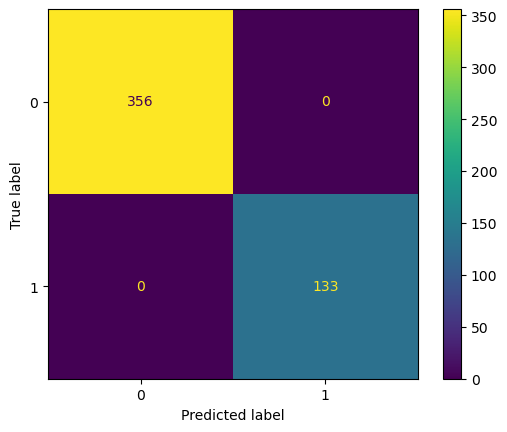

In [8]:
create_logistic_regression_and_confusion_matrix(X, y)

We can see from this data that, when we remove the instances of type 0 we get a logisitc regression model that is __ENTIRELY ACCURATE__
<br>However, as previously stated, __THE DATA HAS BEEN MASSIVLEY SKEWED AS A RESULT__
    <br>With a sample size this small, and ignoring the information of what conditions lead to no accident, it becomes difficult to trust that this model
    <br>could predict train accidents in the real world.
## As a result of these errors, we will disregaurd the results of this second confusion matrix and focus on only the first confusion matrix for the results

# Results
Looking at the fist confusion matrix, we can see that almost all of the accidents of type 1 and type 2 were incorrectly identified by our regression model.
In fact, __ALL OF THE TYPE 2 ACCIDENTS WERE CLASSIFIED INCORRECTLY__.
This indicates that our regression model could not find distinct differences between type 1 and type 2 accidents, implying that there is no major difference between them.
While our data was skewed by the large amount of no accident data, __the massive dispairty of classifications leads to the conclusion that type 1 and type 2 accidents aren't distinct__


### Question 1
Based on the data, I believe that the two types of accidents are not distinguishable, there is no reliable way to tell them apart.

### Question 2
My regressor failed to classify the samples accuratley. While it succeeded in classifying the no accident instances, it failed to classify the majority of type 1 accidents, and failed to classify even 1 type 2 accident correctly, they were all incorrect. Please refer to the first confusion matrix to see the data visualized above. Disregaurd the second confusion matrix as it was created by removing all cases of type 0 (No accident), which massivley skewed the data. The reasoninig behind this is described above.

### Question 3
To view which variables are unnecessary, we can use a heatmap. This map will show which of the values are correlated with each other, this demonstrates that one variable may be redundant as it maintains a similar value with the other variable at all times. As a result, one of them can be safely removed.

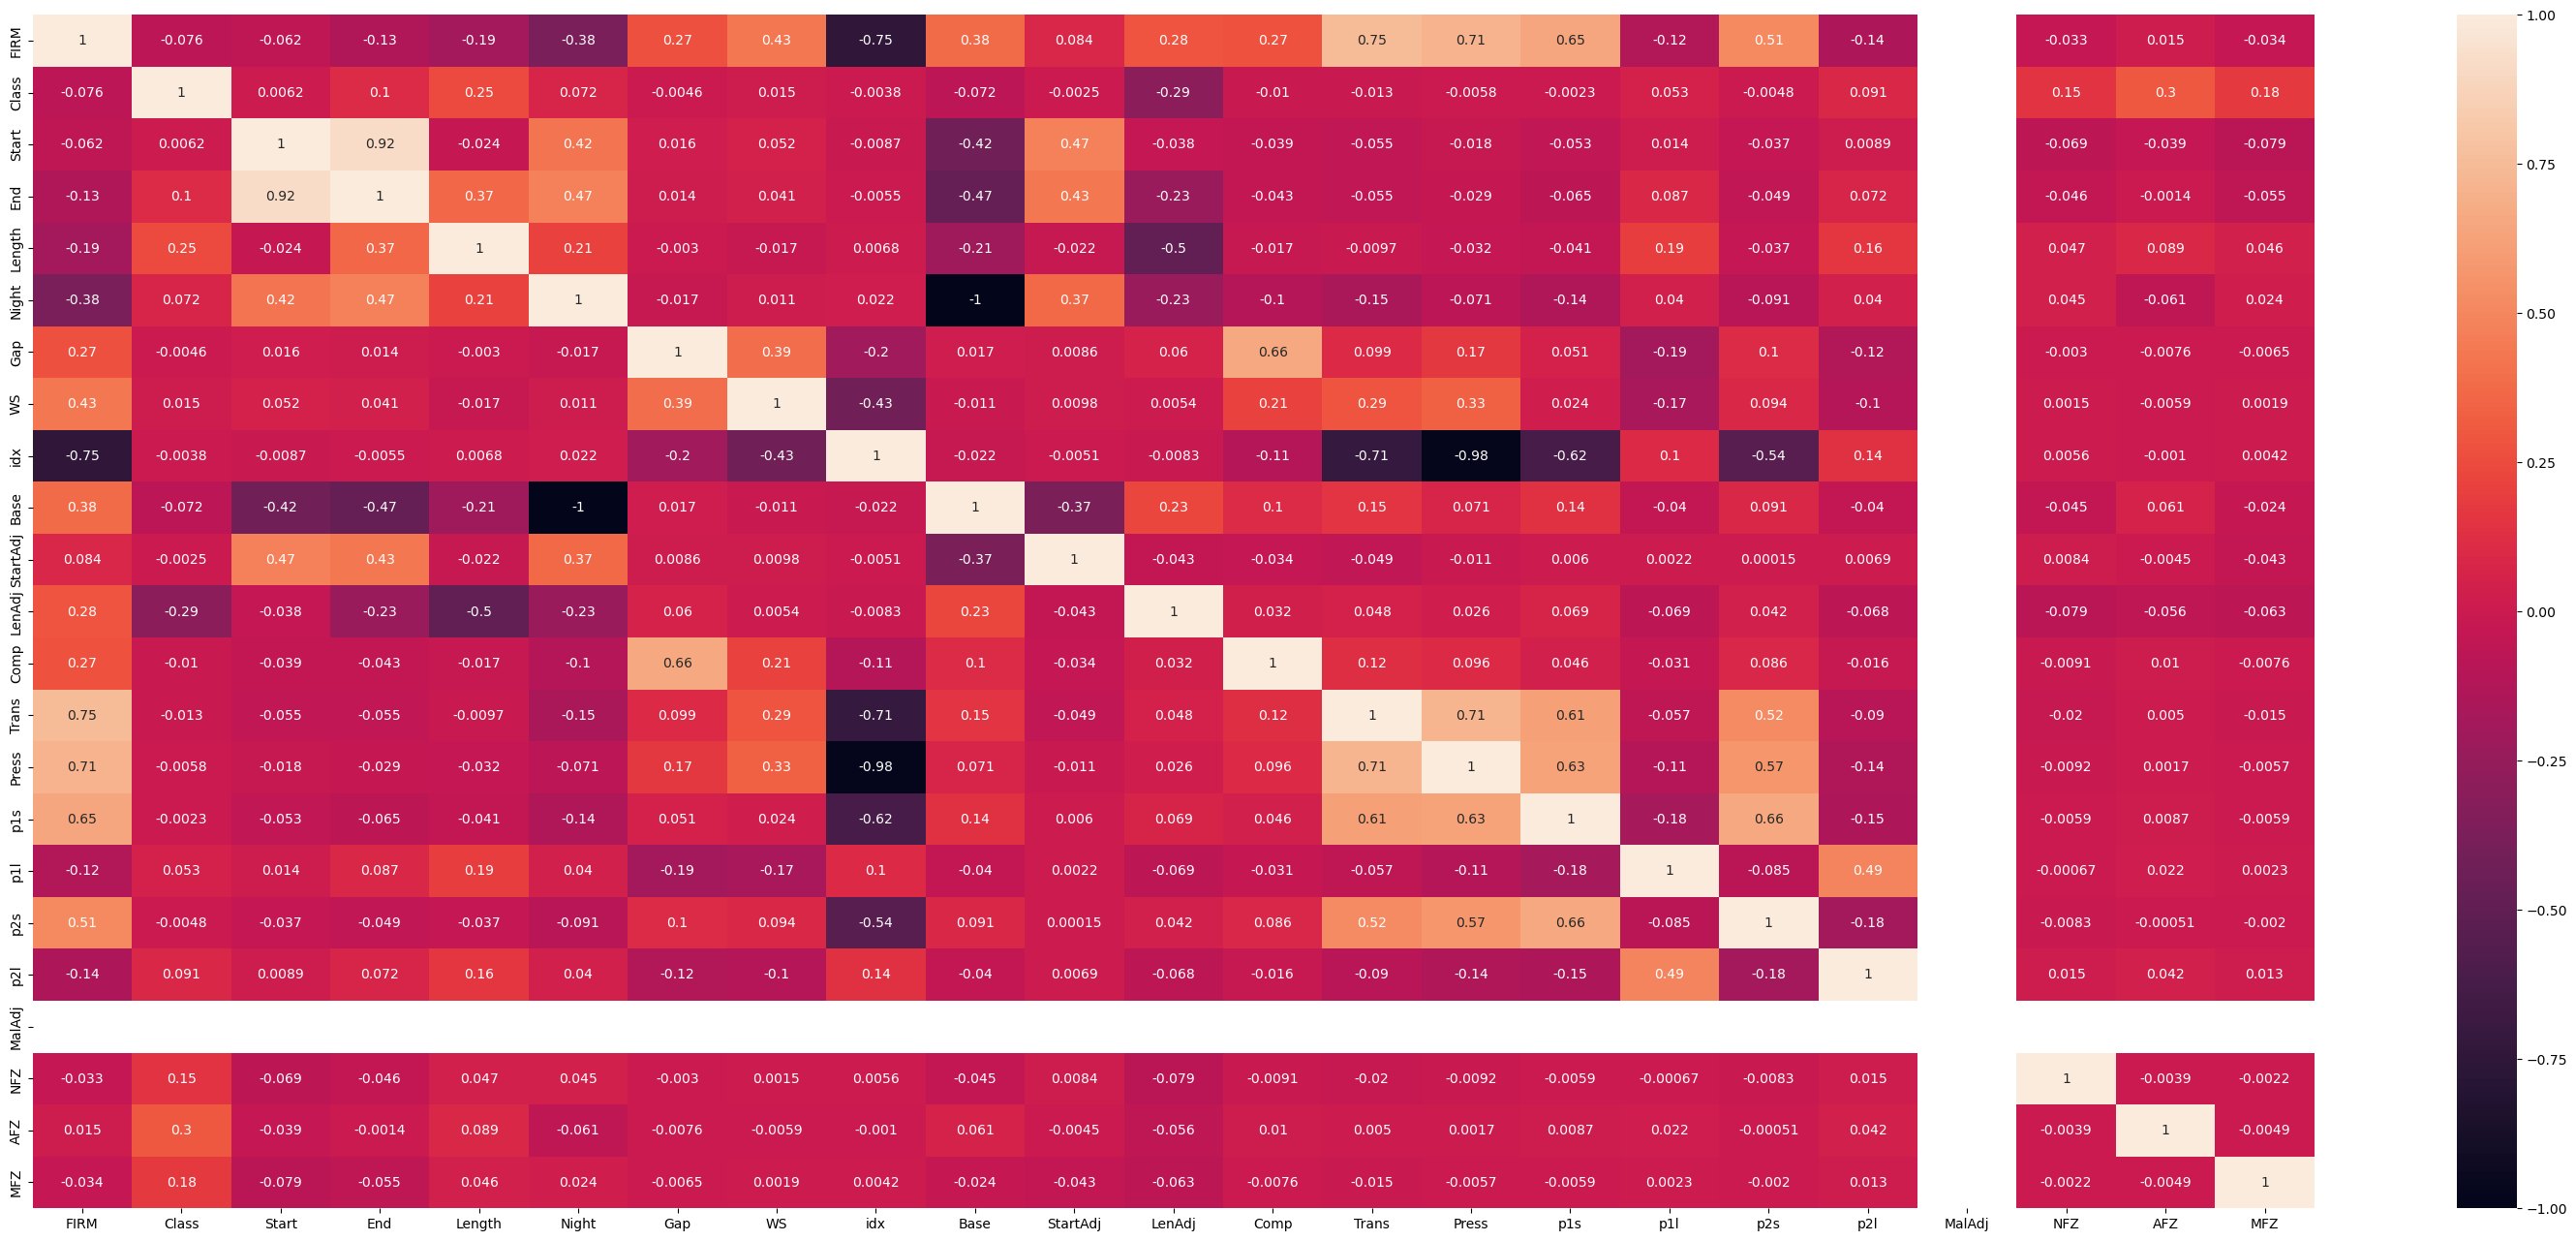

In [9]:
#Create a heatmap
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

We can see from the heatmap that __Base__ and __Night__ are perfectly negativley correlated and __Press__ and __idx__ are very nearly perfectly negativley correlated. __End__ and __Start__ are also correlated, this time positively. This correlation implies that there is little if any important data that we are getting from having both of these values, only one is needed. To an extent this makes sense for start and end, accidents are more likely to happen at night as vision is more restricted. This means that the period of time that the shift occurs in is important, but we can get most of that information from only one of these values. Seeing a start time at 7:00PM is enough to show us that this shift is happening at night time, the same goes for the end time. The only instance where these variables are both needed are if the shift is incredibly long, meaning that a start time of for example 1:00PM would stretch all the way until 10:00PM. In this case, just the start time would not sufficiently indicate if it got dark during that shift. Given that we also have a value indicating if it is night, the start and end times of the shift aren't relevant to seeing if it is night time. However, there may still be important data to be seen with regaurds to when accidents occur. It may be meaningful to know that a certain amount of accidents occur during a certain shift. I feel this data could be important even if the correlation exsists, so I believe that data should be left in.
Some other values have high correlations, but none are nearly as high as the ones mentioned above. I feel we should have at least a 90% correlation to consider removing a value, so these are the only values I considered.
## To conclude, Base and Night are interchangable and we likely only need one of the values between Press and idx. While we could remove either one of the values from these pairs, for demonstration I will remove Base and Press.

In [10]:
df.drop(["Base", "Press"], axis=1, inplace=True)    #Removed Base and Press columns
y = df.Class;   #y is the target, in this case the class of accident
X = df.iloc[:, df.columns != 'Class']
df

,FIRM,Class,Start,End,Length,Night,Gap,WS,idx,StartAdj,...,Comp,Trans,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,-3.25,...,0.0,-4.0,0,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,-3.25,...,0.0,-4.0,-10,320,0,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,0.00,...,0.0,0.0,-10,360,-10,320,0,0,0,0
3,4,0,920,1295,375,0,855,0,2,0.00,...,0.0,0.0,5,465,-10,360,0,0,0,0
4,1,0,1280,1775,495,1,999,1,1,0.00,...,0.0,-1.0,4,375,5,465,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38754,-2,0,855,1275,420,0,999,0,6,0.00,...,0.0,-3.0,-3,490,-2,660,0,0,0,0
38755,-9,0,105,480,375,1,999,0,7,0.00,...,0.0,-5.0,-2,420,-3,490,0,0,0,0
38756,-10,0,360,880,520,0,999,0,8,-2.00,...,0.0,-6.0,-9,375,-2,420,0,0,0,0
38757,-9,0,720,1275,555,0,999,0,9,0.00,...,0.0,-6.0,-10,520,-9,375,0,0,0,0


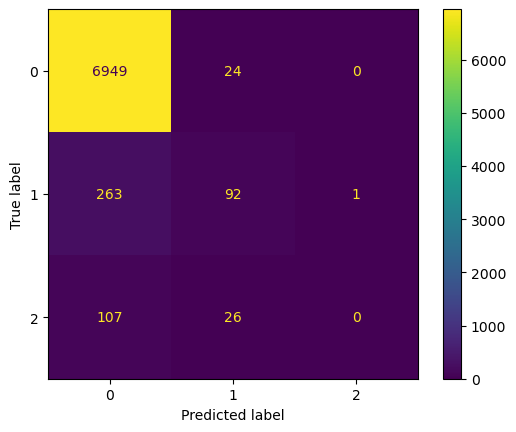

In [11]:
create_logistic_regression_and_confusion_matrix(X, y)

As we can see, removing Base and Press from the data had __no effect__ on our results, showing that these results are unnecessary and can be safely removed.

## Extra Credit
We want to see what removing FIRM does to the regression and the accuracy of our results. We can do this in the same way we removed the previous columns.<br>
Note that we don't have to undo the dropping of the previous columns. As mentioned as the answer to qusetion 3, the removed values should not influence the results.

In [12]:
df.drop(["FIRM"], axis=1, inplace=True)    #Remove FIRM column
y = df.Class;   #y is the target, in this case the class of accident
X = df.iloc[:, df.columns != 'Class']
df

,Class,Start,End,Length,Night,Gap,WS,idx,StartAdj,LenAdj,Comp,Trans,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,0,290,610,320,0,999,0,6,-3.25,-4.00,0.0,-4.0,0,0,0,0,0,0,0,0
1,0,905,1265,360,0,295,0,6,-3.25,-4.00,0.0,-4.0,-10,320,0,0,0,0,0,0
2,0,1040,1505,465,0,999,1,1,0.00,0.00,0.0,0.0,-10,360,-10,320,0,0,0,0
3,0,920,1295,375,0,855,0,2,0.00,0.00,0.0,0.0,5,465,-10,360,0,0,0,0
4,0,1280,1775,495,1,999,1,1,0.00,0.00,0.0,-1.0,4,375,5,465,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38754,0,855,1275,420,0,999,0,6,0.00,0.00,0.0,-3.0,-3,490,-2,660,0,0,0,0
38755,0,105,480,375,1,999,0,7,0.00,0.00,0.0,-5.0,-2,420,-3,490,0,0,0,0
38756,0,360,880,520,0,999,0,8,-2.00,0.00,0.0,-6.0,-9,375,-2,420,0,0,0,0
38757,0,720,1275,555,0,999,0,9,0.00,0.00,0.0,-6.0,-10,520,-9,375,0,0,0,0


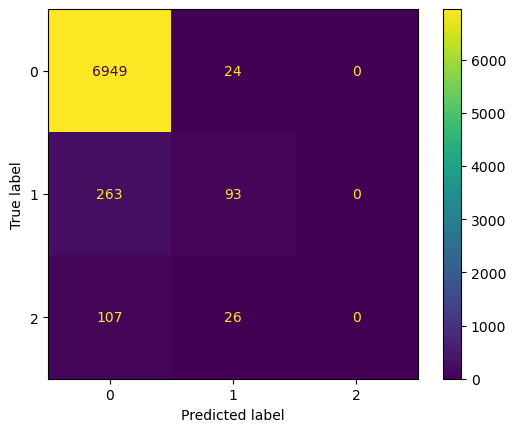

In [13]:
create_logistic_regression_and_confusion_matrix(X, y)

Removing __FIRM__ from the table only had one noteable result, which was moving the one result that was predicted to be type 2 to being predicted of type 1. This is actually an improvement of accuracy, as the true label of that value is type 1. This means that the only tangible result of dropping the __FIRM__ label is an improvement of accuracy. While the results are still largley inaccurate, it is still technically an improvement.